<a href="https://colab.research.google.com/github/ValeriaYashan/analisis_datos/blob/main/Lanzamiento_misiones_espaciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
import pandas as pd

# Cargar el archivo
uploaded = files.upload()

# Obtener el nombre del archivo cargado
archivo_cargado = list(uploaded.keys())[0]

# Leer el DataFrame desde el archivo cargado
df = pd.read_csv(archivo_cargado)

# Mostrar las primeras filas del DataFrame para verificar
df.head()

Saving mission_launches.csv to mission_launches.csv


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [14]:
# Convierte la columna 'Date' a formato de fecha
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

# Pregunta 1: ¿Qué organización lanzó más misiones espaciales en un año determinado?
max_missions_year = df.groupby([df['Date'].dt.year, 'Organisation']).size().unstack().idxmax(axis=1)
print("Organización que lanzó más misiones en un año determinado:")
print(max_missions_year)


Organización que lanzó más misiones en un año determinado:
Date
1957       RVSN USSR
1958         US Navy
1959    US Air Force
1960    US Air Force
1961    US Air Force
            ...     
2016            CASC
2017          SpaceX
2018            CASC
2019            CASC
2020            CASC
Length: 64, dtype: object


In [15]:
# Pregunta 2: ¿Cuántos lanzamientos se realizaron por año?
launches_per_year = df['Date'].dt.year.value_counts().sort_index()
print("\nLanzamientos por año:")
print(launches_per_year)


Lanzamientos por año:
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Date, Length: 64, dtype: int64


In [17]:
# Convierte la columna 'Date' a formato de fecha
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

# Convierte la columna 'Price' a números, ignorando los valores no numéricos
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Pregunta 3: ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?
avg_price_per_year = df.groupby(df['Date'].dt.year)['Price'].mean()
print("\nCosto promedio de una misión espacial por año:")
print(avg_price_per_year)


Costo promedio de una misión espacial por año:
Date
1957          NaN
1958          NaN
1959          NaN
1960          NaN
1961          NaN
          ...    
2016    79.457344
2017    69.491061
2018    64.749773
2019    59.609726
2020    56.650192
Name: Price, Length: 64, dtype: float64


In [18]:
# Pregunta 4: ¿Qué meses son los más populares para los lanzamientos?
launches_per_month = df['Date'].dt.month.value_counts().sort_index()
print("\nLanzamientos por mes:")
print(launches_per_month)


Lanzamientos por mes:
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Date, dtype: int64


In [19]:
# Pregunta 5: ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?
mission_status_counts = df['Mission_Status'].value_counts()
print("\nEstado de las misiones:")
print(mission_status_counts)


Estado de las misiones:
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64


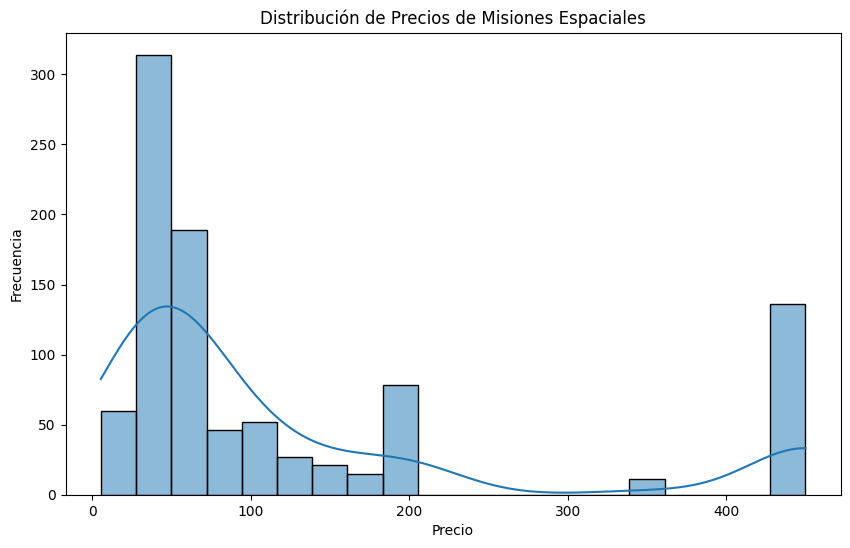

In [20]:
# Análisis de Distribución
# Histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribución de Precios de Misiones Espaciales')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

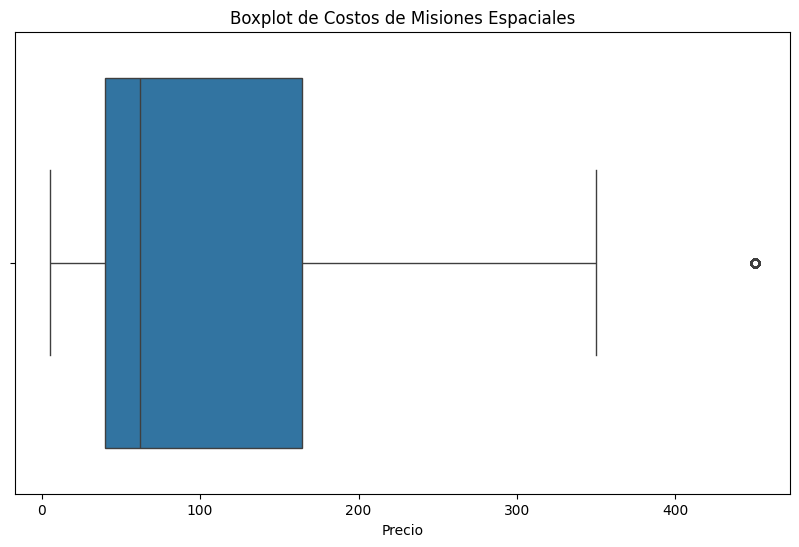

In [21]:
# Boxplot de costos de misiones
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot de Costos de Misiones Espaciales')
plt.xlabel('Precio')
plt.show()

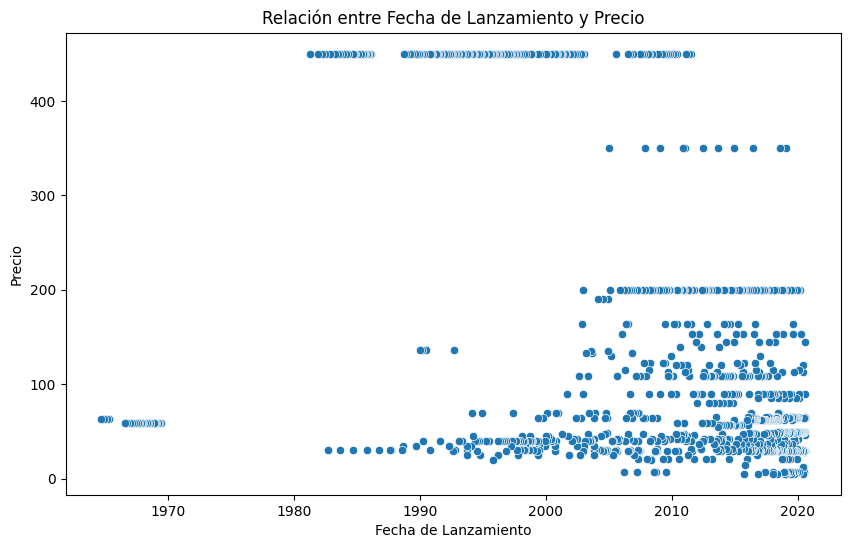

In [22]:
# Análisis de Relaciones
# Scatter plot entre precio y fecha de lanzamiento
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Date'], y=df['Price'])
plt.title('Relación entre Fecha de Lanzamiento y Precio')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Precio')
plt.show()

<ipython-input-23-9eec7426b02a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


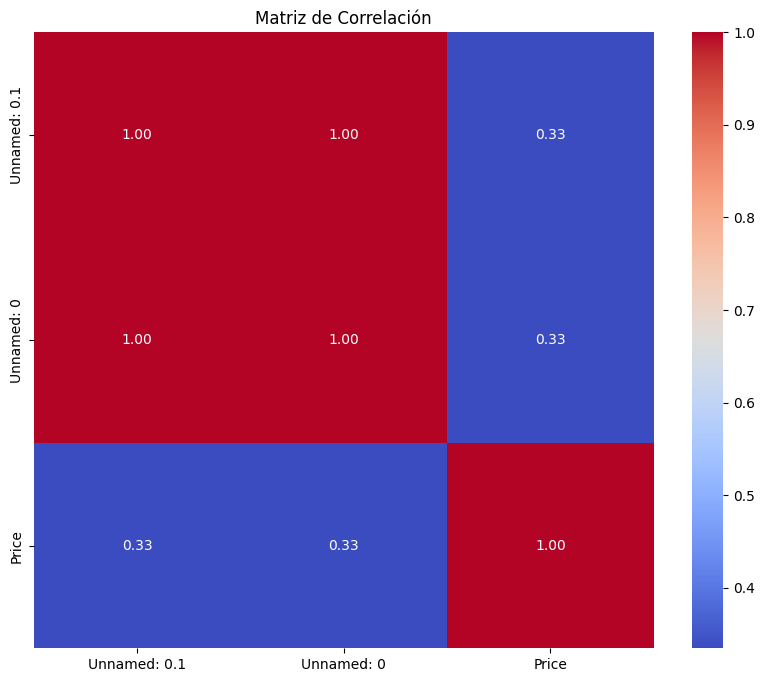

In [23]:
# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

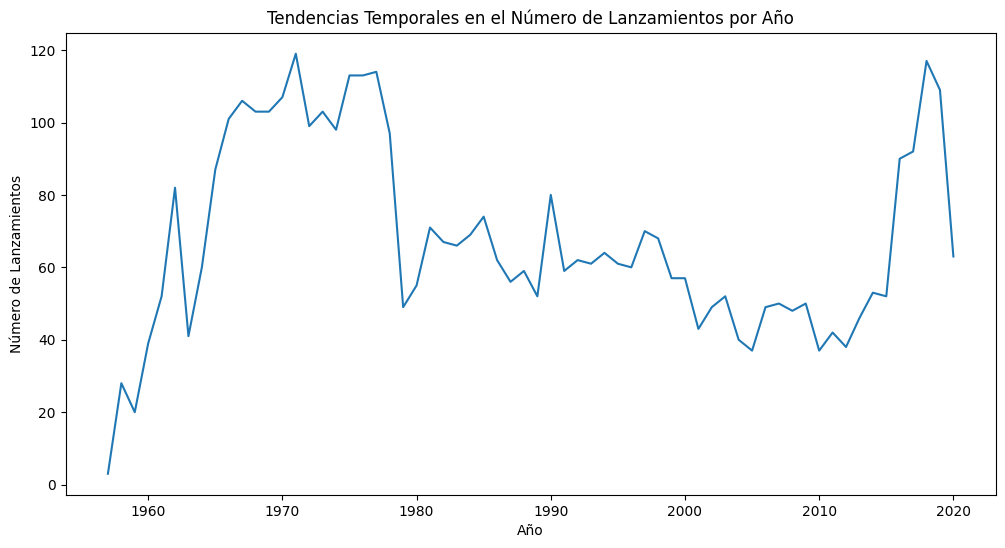

In [24]:
# Análisis Temporal
# Tendencias temporales en el número de lanzamientos
df['Year'] = df['Date'].dt.year
launches_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=launches_per_year.index, y=launches_per_year.values)
plt.title('Tendencias Temporales en el Número de Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Lanzamientos')
plt.show()

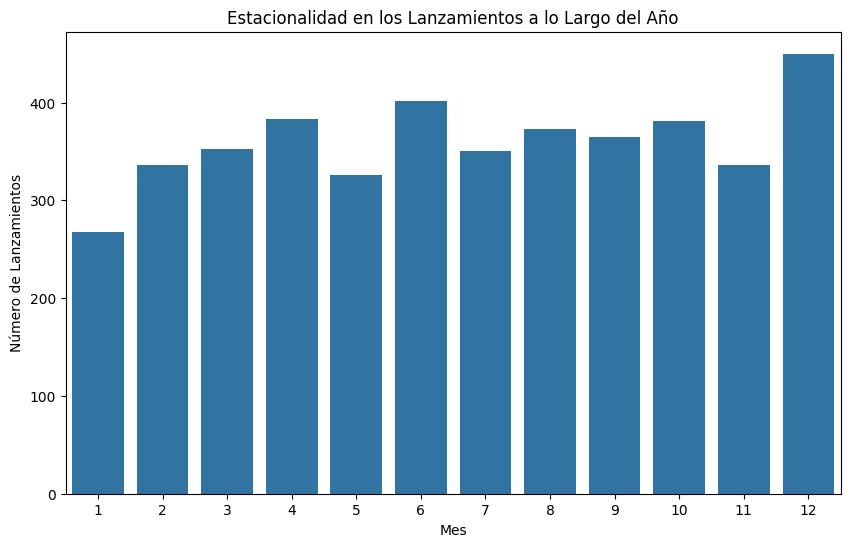

In [25]:
# Estacionalidad en los lanzamientos a lo largo del año
df['Month'] = df['Date'].dt.month
launches_per_month = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=launches_per_month.index, y=launches_per_month.values)
plt.title('Estacionalidad en los Lanzamientos a lo Largo del Año')
plt.xlabel('Mes')
plt.ylabel('Número de Lanzamientos')
plt.show()

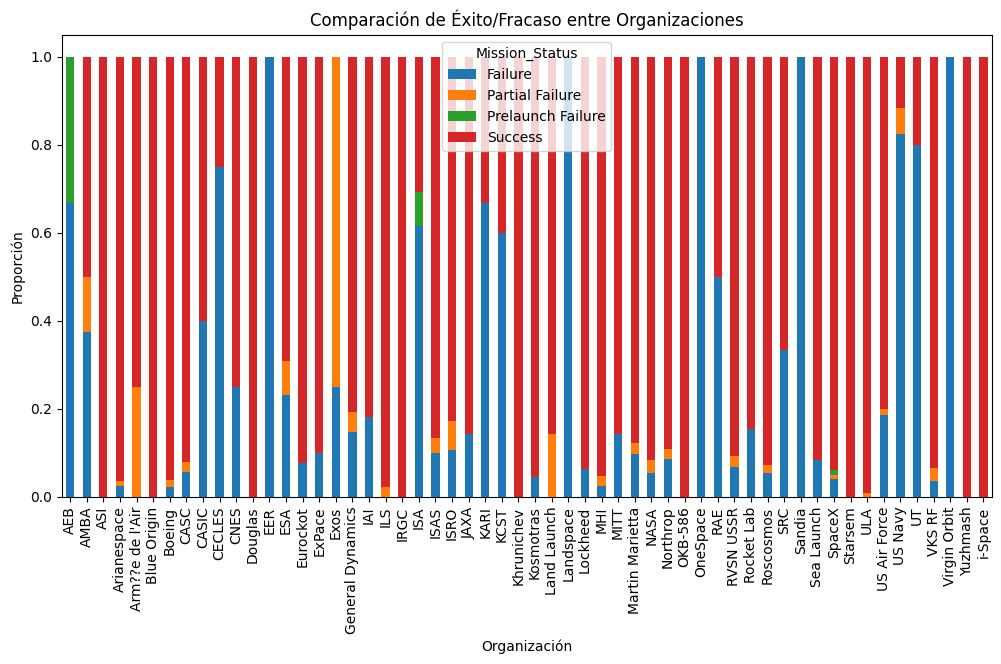

In [26]:
# Agrupación y Comparación
# Comparación de éxito/fracaso entre organizaciones
organization_success_ratio = df.groupby('Organisation')['Mission_Status'].value_counts(normalize=True).unstack().fillna(0)
organization_success_ratio.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Comparación de Éxito/Fracaso entre Organizaciones')
plt.xlabel('Organización')
plt.ylabel('Proporción')
plt.show()

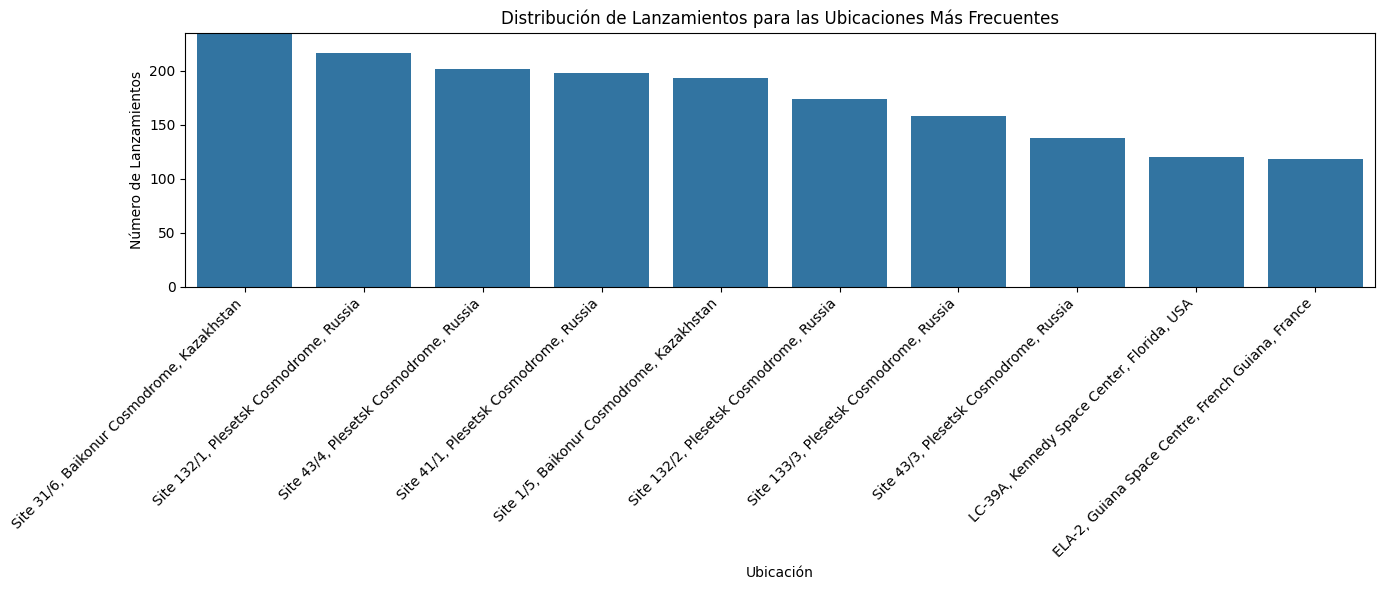

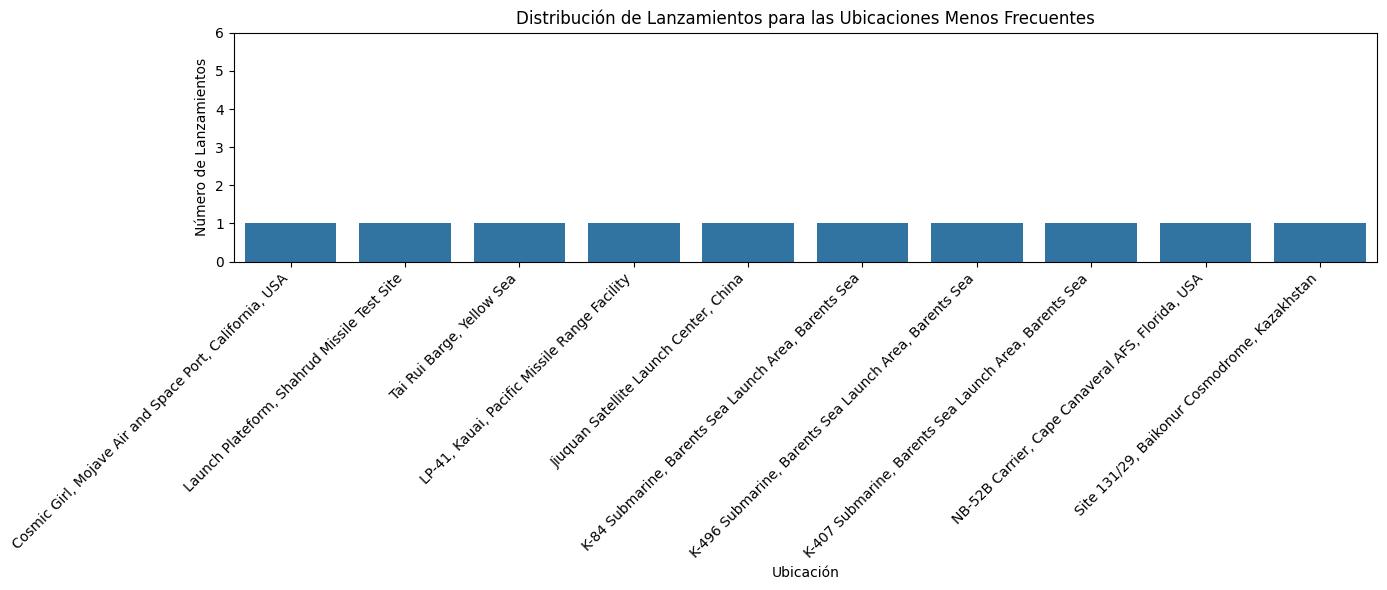

In [43]:
# Ordena las ubicaciones por frecuencia
sorted_locations = df['Location'].value_counts().index

# Divide el DataFrame en dos partes: mayores y menores
top_locations = df[df['Location'].isin(sorted_locations[:10])]  # Cambia el número según tus preferencias
bottom_locations = df[df['Location'].isin(sorted_locations[-10:])]  # Cambia el número según tus preferencias

# Encuentra el número máximo de lanzamientos en ambas categorías
max_top_launches = top_locations['Location'].value_counts().max()
max_bottom_launches = bottom_locations['Location'].value_counts().max()

# Gráfico para las ubicaciones mayores
plt.figure(figsize=(14, 6))
sns.countplot(x=top_locations['Location'], order=top_locations['Location'].value_counts().index)
plt.title('Distribución de Lanzamientos para las Ubicaciones Más Frecuentes')
plt.xlabel('Ubicación')
plt.ylabel('Número de Lanzamientos')
plt.ylim(0, max_top_launches)  # Ajusta la escala para que sea igual en ambos gráficos
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico para las ubicaciones menores
plt.figure(figsize=(14, 6))
sns.countplot(x=bottom_locations['Location'], order=bottom_locations['Location'].value_counts().index)
plt.title('Distribución de Lanzamientos para las Ubicaciones Menos Frecuentes')
plt.xlabel('Ubicación')
plt.ylabel('Número de Lanzamientos')
plt.ylim(0, max_bottom_launches + 5)  # Ajusta la escala para una mejor visualización
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# Análisis de Costos
# Estadísticas descriptivas para el costo de las misiones
cost_stats = df['Price'].describe()
print('Estadísticas descriptivas para el costo de las misiones:')
print(cost_stats)

Estadísticas descriptivas para el costo de las misiones:
count    949.000000
mean     129.795237
std      143.220323
min        5.300000
25%       40.000000
50%       62.000000
75%      164.000000
max      450.000000
Name: Price, dtype: float64


In [29]:
# Identificación de las misiones más costosas o económicas
most_expensive_missions = df.nlargest(5, 'Price')[['Organisation', 'Mission_Status', 'Date', 'Price']]
least_expensive_missions = df.nsmallest(5, 'Price')[['Organisation', 'Mission_Status', 'Date', 'Price']]
print('\nMisiones más costosas:')
print(most_expensive_missions)
print('\nMisiones más económicas:')
print(least_expensive_missions)


Misiones más costosas:
    Organisation Mission_Status                      Date  Price
682         NASA        Success 2011-07-08 15:29:00+00:00  450.0
687         NASA        Success 2011-05-16 12:56:00+00:00  450.0
695         NASA        Success 2011-02-24 21:53:00+00:00  450.0
726         NASA        Success 2010-05-14 18:20:00+00:00  450.0
733         NASA        Success 2010-04-05 10:21:00+00:00  450.0

Misiones más económicas:
    Organisation Mission_Status                      Date  Price
26          CASC        Success 2020-05-29 20:13:00+00:00    5.3
102         CASC        Success 2019-09-19 06:42:00+00:00    5.3
133         CASC        Success 2019-06-05 04:06:00+00:00    5.3
166         CASC        Success 2019-01-21 05:42:00+00:00    5.3
176         CASC        Success 2018-12-21 23:51:00+00:00    5.3


In [30]:
# Análisis de Éxito/Fracaso
# Proporción de éxito/fracaso
success_failure_ratio = df['Mission_Status'].value_counts(normalize=True)
print('\nProporción de Éxito/Fracaso:')
print(success_failure_ratio)


Proporción de Éxito/Fracaso:
Success              0.897086
Failure              0.078400
Partial Failure      0.023589
Prelaunch Failure    0.000925
Name: Mission_Status, dtype: float64


In [31]:
# Análisis de misiones fallidas
failed_missions = df[df['Mission_Status'] == 'Failure']
common_failure_reasons = failed_missions['Detail'].value_counts().head(5)
print('\nRazones Comunes de Misiones Fallidas:')
print(common_failure_reasons)


Razones Comunes de Misiones Fallidas:
Lambda-IV S | Osumi                         4
Proton K/Block D | Zond                     4
Safir-1B+ | Unknown Payload                 3
Cosmos-3M (11K65M) | Strela-2M satellite    2
Cosmos-2I (63S1) | DS-2 #2                  1
Name: Detail, dtype: int64


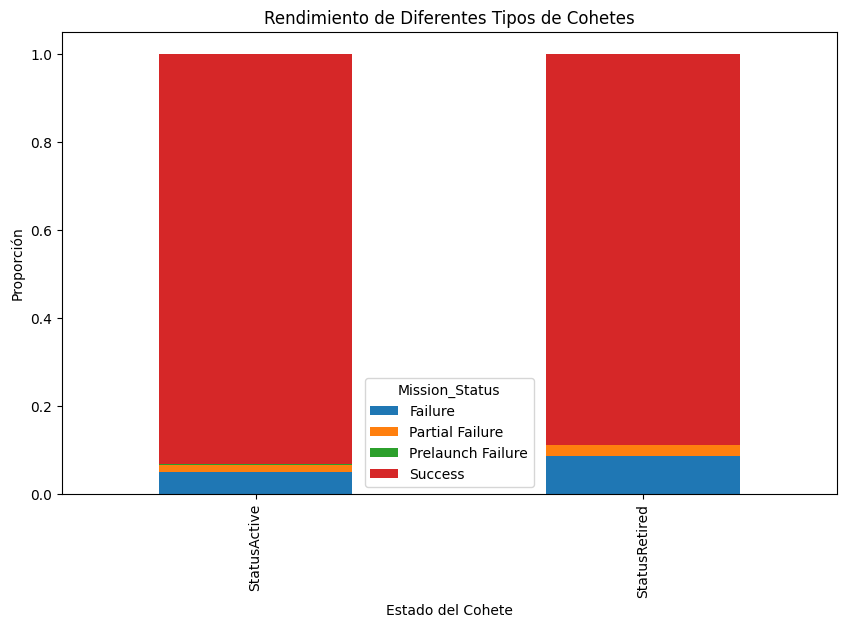

In [32]:
# Agrupación por Tipo de Cohete
# Rendimiento de diferentes tipos de cohetes
rocket_performance = df.groupby('Rocket_Status')['Mission_Status'].value_counts(normalize=True).unstack().fillna(0)
rocket_performance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Rendimiento de Diferentes Tipos de Cohetes')
plt.xlabel('Estado del Cohete')
plt.ylabel('Proporción')
plt.show()

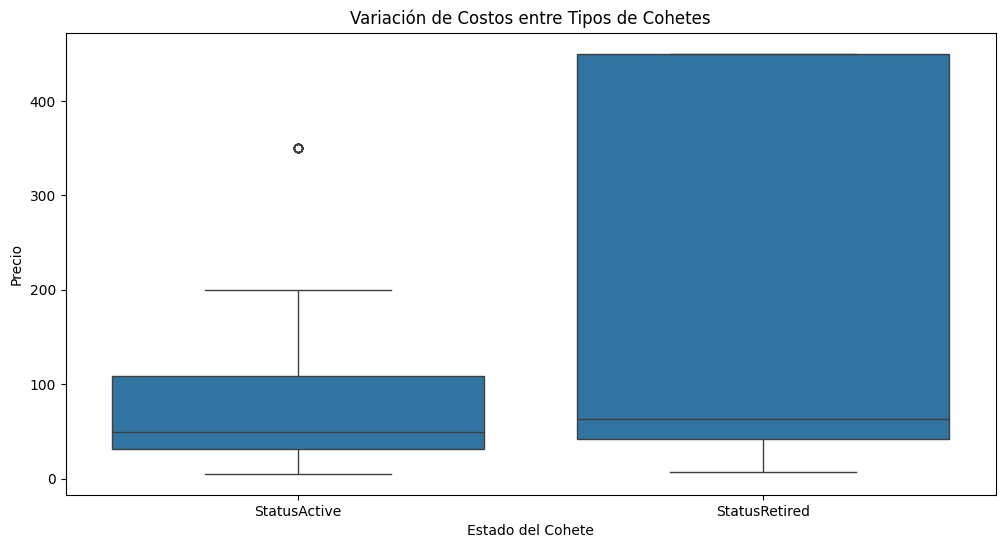

In [33]:
# Variación de costos entre tipos de cohetes
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Rocket_Status'], y=df['Price'])
plt.title('Variación de Costos entre Tipos de Cohetes')
plt.xlabel('Estado del Cohete')
plt.ylabel('Precio')
plt.show()